In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [2]:
# carga de datos
data = pd.read_csv('../../datasets/BreadBasket_DMS.csv')
data.head()

,Date,Time,Transaction,Item
0,2016-10-30,09:58:11,1,Bread
1,2016-10-30,10:05:34,2,Scandinavian
2,2016-10-30,10:05:34,2,Scandinavian
3,2016-10-30,10:07:57,3,Hot chocolate
4,2016-10-30,10:07:57,3,Jam


In [3]:
# analisis del dataset
data.describe()

,Transaction
count,21293.000000
mean,4951.990889
std,2787.758400
min,1.000000
25%,2548.000000
50%,5067.000000
75%,7329.000000
max,9684.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21293 entries, 0 to 21292
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         21293 non-null  object
 1   Time         21293 non-null  object
 2   Transaction  21293 non-null  int64 
 3   Item         21293 non-null  object
dtypes: int64(1), object(3)
memory usage: 665.5+ KB


In [5]:
data['DateTime'] = pd.to_datetime(data.Date +' '+data.Time);

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21293 entries, 0 to 21292
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         21293 non-null  object        
 1   Time         21293 non-null  object        
 2   Transaction  21293 non-null  int64         
 3   Item         21293 non-null  object        
 4   DateTime     21293 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 831.9+ KB


In [7]:
data.Item.value_counts()

Coffee          5471
Bread           3325
Tea             1435
Cake            1025
Pastry           856
                ... 
The BART           1
Adjustment         1
Raw bars           1
Polenta            1
Chicken sand       1
Name: Item, Length: 95, dtype: int64

In [8]:
# Clasificación de productos
beverage = ['Hot chocolate', 'Coffee', 'Tea', 'Mineral water', 'Juice', 'Coke', 'Smoothies']
other = ['NONE', 'Christmas common', 'Gift voucher', "Valentine's card", 'Tshirt', 'Afternoon with the baker', 'Postcard', 'Siblings', 'Nomad bag', 'Adjustment', 'Drinking chocolate spoons ', 'Coffee granules ']
kids = ["Ella's Kitchen Pouches", 'My-5 Fruit Shoot', 'Kids biscuit']
snacks = ['Mighty Protein', 'Pick and Mix Bowls', 'Caramel bites', 'Bare Popcorn', 'Crisps', 'Cherry me Dried fruit', 'Raw bars']
bread = ['Bread', 'Toast', 'Baguette', 'Focaccia', 'Scandinavian']
breakfast_pastry = ['Muffin', 'Pastry', 'Medialuna', 'Scone']
dessert = ['Cookies', 'Tartine', 'Fudge', 'Victorian Sponge', 'Cake', 'Alfajores', 'Brownie', 'Bread Pudding', 'Bakewell', 'Raspberry shortbread sandwich', 'Lemon and coconut', 'Crepes', 'Chocolates', 'Truffles', 'Panatone']
condiments = ['Jam', 'Dulce de Leche', 'Honey', 'Gingerbread syrup', 'Extra Salami or Feta', 'Bacon', 'Spread', 'Chimichurri Oil']
breakfast = ['Eggs', 'Frittata', 'Granola', 'Muesli', 'Duck egg', 'Brioche and salami']
lunch = ['Soup', 'Sandwich', 'Chicken sand', 'Salad', 'Chicken Stew']
other_food = [x for x in data.Item.unique() if x not in beverage 
                and x not in other and x not in kids and x not in snacks 
                and x not in bread and x not in breakfast_pastry 
                and x not in dessert and x not in condiments 
                and x not in breakfast and x not in lunch]

In [9]:
data['beverage'] = np.where(data.Item.isin(beverage), 1, 0)
data['other'] = np.where(data.Item.isin(other), 1, 0)
data['kids'] = np.where(data.Item.isin(kids), 1, 0)
data['snacks'] = np.where(data.Item.isin(snacks), 1, 0)
data['bread'] = np.where(data.Item.isin(bread), 1, 0)
data['breakfast_pastry'] = np.where(data.Item.isin(breakfast_pastry), 1, 0)
data['dessert'] = np.where(data.Item.isin(dessert), 1, 0)
data['condiments'] = np.where(data.Item.isin(condiments), 1, 0)
data['breakfast'] = np.where(data.Item.isin(breakfast), 1, 0)
data['lunch'] = np.where(data.Item.isin(lunch), 1, 0)
data['other_food'] = np.where(data.Item.isin(other_food), 1, 0)
data.head()

,Date,Time,Transaction,Item,DateTime,beverage,other,kids,snacks,bread,breakfast_pastry,dessert,condiments,breakfast,lunch,other_food
0,2016-10-30,09:58:11,1,Bread,2016-10-30 09:58:11,0,0,0,0,1,0,0,0,0,0,0
1,2016-10-30,10:05:34,2,Scandinavian,2016-10-30 10:05:34,0,0,0,0,1,0,0,0,0,0,0
2,2016-10-30,10:05:34,2,Scandinavian,2016-10-30 10:05:34,0,0,0,0,1,0,0,0,0,0,0
3,2016-10-30,10:07:57,3,Hot chocolate,2016-10-30 10:07:57,1,0,0,0,0,0,0,0,0,0,0
4,2016-10-30,10:07:57,3,Jam,2016-10-30 10:07:57,0,0,0,0,0,0,0,1,0,0,0


# Procesando los datos

In [10]:
# agrupando por transacción, fecha y hora
df = data.groupby(['Transaction','DateTime']).sum()
df.head()

,,beverage,other,kids,snacks,bread,breakfast_pastry,dessert,condiments,breakfast,lunch,other_food
Transaction,DateTime,,,,,,,,,,,
1,2016-10-30 09:58:11,0,0,0,0,1,0,0,0,0,0,0
2,2016-10-30 10:05:34,0,0,0,0,2,0,0,0,0,0,0
3,2016-10-30 10:07:57,1,0,0,0,0,0,1,1,0,0,0
4,2016-10-30 10:08:41,0,0,0,0,0,1,0,0,0,0,0
5,2016-10-30 10:13:03,1,0,0,0,1,1,0,0,0,0,0


In [11]:
# restablenciendo el indice
df.reset_index(level=['DateTime'], inplace=True)
df.head()

,DateTime,beverage,other,kids,snacks,bread,breakfast_pastry,dessert,condiments,breakfast,lunch,other_food
Transaction,,,,,,,,,,,,
1,2016-10-30 09:58:11,0,0,0,0,1,0,0,0,0,0,0
2,2016-10-30 10:05:34,0,0,0,0,2,0,0,0,0,0,0
3,2016-10-30 10:07:57,1,0,0,0,0,0,1,1,0,0,0
4,2016-10-30 10:08:41,0,0,0,0,0,1,0,0,0,0,0
5,2016-10-30 10:13:03,1,0,0,0,1,1,0,0,0,0,0


In [12]:
# descomposición de fecha en días y horas
df['day'] = df.DateTime.dt.day_name()
df['hour'] = df.DateTime.dt.hour

In [13]:
# que día se vende más?
df.day.value_counts()

Saturday     2068
Friday       1488
Sunday       1264
Thursday     1252
Tuesday      1203
Monday       1135
Wednesday    1121
Name: day, dtype: int64

In [14]:
# a que hora se vende más?
df.hour.value_counts()

11    1445
12    1347
10    1267
13    1163
14    1130
9     1007
15     924
16     583
8      375
17     160
18      52
19      34
7       16
20      15
22       7
23       3
21       2
1        1
Name: hour, dtype: int64

In [15]:
# los algoritmos de ML trabajan solo con columnas númericas por lo que hay que crear columnas ficticias para los días
df_n = pd.get_dummies(data=df, columns=['day'])
df_n.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9531 entries, 1 to 9684
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   DateTime          9531 non-null   datetime64[ns]
 1   beverage          9531 non-null   int32         
 2   other             9531 non-null   int32         
 3   kids              9531 non-null   int32         
 4   snacks            9531 non-null   int32         
 5   bread             9531 non-null   int32         
 6   breakfast_pastry  9531 non-null   int32         
 7   dessert           9531 non-null   int32         
 8   condiments        9531 non-null   int32         
 9   breakfast         9531 non-null   int32         
 10  lunch             9531 non-null   int32         
 11  other_food        9531 non-null   int32         
 12  hour              9531 non-null   int64         
 13  day_Friday        9531 non-null   uint8         
 14  day_Monday        9531 n

In [16]:
# y eliminar la columna DateTime
df_n.drop(columns='DateTime', axis=1, inplace=True)
df_n.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9531 entries, 1 to 9684
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   beverage          9531 non-null   int32
 1   other             9531 non-null   int32
 2   kids              9531 non-null   int32
 3   snacks            9531 non-null   int32
 4   bread             9531 non-null   int32
 5   breakfast_pastry  9531 non-null   int32
 6   dessert           9531 non-null   int32
 7   condiments        9531 non-null   int32
 8   breakfast         9531 non-null   int32
 9   lunch             9531 non-null   int32
 10  other_food        9531 non-null   int32
 11  hour              9531 non-null   int64
 12  day_Friday        9531 non-null   uint8
 13  day_Monday        9531 non-null   uint8
 14  day_Saturday      9531 non-null   uint8
 15  day_Sunday        9531 non-null   uint8
 16  day_Thursday      9531 non-null   uint8
 17  day_Tuesday       9531 non-null  

In [17]:
# Una nota importante es que la agrupación de cluster de KMedias no trabaja del todo bien con columnas dummies
# por lo que aplicaremos un PCA (Analisis de Componente Principales) que proyecta los datos en un subespacio de menor dimensión.
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=4)
pca_model = pca.fit_transform(df_n)
pca_df = pd.DataFrame(data=pca_model, columns=['pca_1', 'pac_2', 'pca_3', 'pca_4'])
pca_df.head()

,pca_1,pac_2,pca_3,pca_4
0,3.197413,-0.926669,0.244943,0.005963
1,2.227896,-1.274346,1.183379,-0.159247
2,2.107647,0.424885,-0.219953,0.880101
3,2.198960,-0.580674,-0.783343,-0.031019
4,2.206812,0.037385,0.443753,-0.333655


In [ ]:
# Aplicando el algoritmo de agrupación KMeans
from sklearn.cluster import KMeans

In [ ]:
kmeans = KMeans(n_clusters=5)
df_clusters = kmeans.fit(pca_df)
df_clusters.cluster_centers_

array([[-1.34863660e+00, -6.42964531e-03, -4.63966599e-02,
         3.18842848e-03],
       [ 2.91503250e+00, -1.37994770e-01, -9.35327545e-03,
         3.37325555e-03],
       [ 6.62483837e-01, -7.25271798e-01,  1.32463446e-01,
         4.34853304e-02],
       [ 8.47623398e-01,  8.42531225e-01, -7.26468181e-02,
        -5.17266524e-02],
       [-3.60462547e+00, -1.92471548e-02,  3.54638446e-02,
         5.46332281e-03]])

In [ ]:
# Aplicamos las etiquetas al dataframe agrupado por transacción
df['labels'] = df_clusters.fit_predict(pca_df)
df.head(3)

,DateTime,beverage,other,kids,snacks,bread,breakfast_pastry,dessert,condiments,breakfast,lunch,other_food,day,hour,labels
Transaction,,,,,,,,,,,,,,,
1,2016-10-30 09:58:11,0,0,0,0,1,0,0,0,0,0,0,Sunday,9,1
2,2016-10-30 10:05:34,0,0,0,0,2,0,0,0,0,0,0,Sunday,10,4
3,2016-10-30 10:07:57,1,0,0,0,0,0,1,1,0,0,0,Sunday,10,4


In [ ]:
# reseteamos el indice de la transacción para utilizarlo como llave para concatenarlo al dataset original
df.reset_index('Transaction', inplace=True)
df.head(3)

,Transaction,DateTime,beverage,other,kids,snacks,bread,breakfast_pastry,dessert,condiments,breakfast,lunch,other_food,day,hour,labels
0,1,2016-10-30 09:58:11,0,0,0,0,1,0,0,0,0,0,0,Sunday,9,1
1,2,2016-10-30 10:05:34,0,0,0,0,2,0,0,0,0,0,0,Sunday,10,4
2,3,2016-10-30 10:07:57,1,0,0,0,0,0,1,1,0,0,0,Sunday,10,4


In [ ]:
# Concatenamos las etiquetas a nuestro dataset principal (original)
df_full = pd.merge(data, df[['Transaction','labels']], on='Transaction', how='outer')
df_full.head(10)

,Date,Time,Transaction,Item,DateTime,beverage,other,kids,snacks,bread,breakfast_pastry,dessert,condiments,breakfast,lunch,other_food,labels
0,2016-10-30,09:58:11,1,Bread,2016-10-30 09:58:11,0,0,0,0,1,0,0,0,0,0,0,1
1,2016-10-30,10:05:34,2,Scandinavian,2016-10-30 10:05:34,0,0,0,0,1,0,0,0,0,0,0,4
2,2016-10-30,10:05:34,2,Scandinavian,2016-10-30 10:05:34,0,0,0,0,1,0,0,0,0,0,0,4
3,2016-10-30,10:07:57,3,Hot chocolate,2016-10-30 10:07:57,1,0,0,0,0,0,0,0,0,0,0,4
4,2016-10-30,10:07:57,3,Jam,2016-10-30 10:07:57,0,0,0,0,0,0,0,1,0,0,0,4
5,2016-10-30,10:07:57,3,Cookies,2016-10-30 10:07:57,0,0,0,0,0,0,1,0,0,0,0,4
6,2016-10-30,10:08:41,4,Muffin,2016-10-30 10:08:41,0,0,0,0,0,1,0,0,0,0,0,4
7,2016-10-30,10:13:03,5,Coffee,2016-10-30 10:13:03,1,0,0,0,0,0,0,0,0,0,0,4
8,2016-10-30,10:13:03,5,Pastry,2016-10-30 10:13:03,0,0,0,0,0,1,0,0,0,0,0,4
9,2016-10-30,10:13:03,5,Bread,2016-10-30 10:13:03,0,0,0,0,1,0,0,0,0,0,0,4


In [ ]:
# revisemos transacciones por cluster
df_full.labels.value_counts()

4    5979
0    5786
3    4894
1    2740
2    1894
Name: labels, dtype: int64

In [ ]:
# revisemos los cluster asignos por hora
pd.crosstab(df.hour, df.labels)

labels,0,1,2,3,4
hour,,,,,
1,0,1,0,0,0
7,0,16,0,0,0
8,0,375,0,0,0
9,0,1007,0,0,0
10,0,0,0,0,1267
11,0,0,0,0,1445
12,1347,0,0,0,0
13,1162,0,0,1,0
14,0,0,0,1130,0


In [ ]:
# se puede ver como los grupos 0, 1 y 3 se centran al medio días
# mientras el gupo 2 se centra por la mañana y el 4 por la tarde

In [ ]:
# hagamos el mismo analisis para los días de la semana
pd.crosstab(df.day, df.labels)

labels,0,1,2,3,4
day,,,,,
Friday,387,280,134,299,388
Monday,313,173,91,255,303
Saturday,489,302,234,418,625
Sunday,389,89,47,298,441
Thursday,319,203,117,281,332
Tuesday,343,180,115,249,316
Wednesday,269,172,118,255,307


In [ ]:
# el grupo 2 que es el de las mañanas vemos que los días de mayor venta son los sabados y viernes
# mietras la venta baja considerablemente los domingos y lunes
# y se mantiene en promedio los martes, miercoles y jueves

In [ ]:
# Cuales son los productos que más se venden por grupo?
a = df_full.groupby('labels').Item.value_counts()
b = a.to_frame('counts').reset_index()
b.set_index('Item', inplace=True)
b.groupby('labels').counts.nlargest(5)

labels  Item         
0       Coffee           1346
        Bread             814
        Sandwich          394
        Tea               363
        NONE              326
1       Coffee            795
        Bread             574
        Pastry            250
        Medialuna         169
        Tea               124
2       Coffee            408
        Bread             250
        Tea               175
        Cake              154
        Hot chocolate      94
3       Coffee           1156
        Bread             651
        Tea               441
        Cake              356
        Sandwich          248
4       Coffee           1766
        Bread            1036
        Pastry            354
        Tea               332
        Medialuna         233
Name: counts, dtype: int64

C:\Users\lgutierrez\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


TypeError: The x variable is categorical, but one of ['numeric', 'datetime'] is required

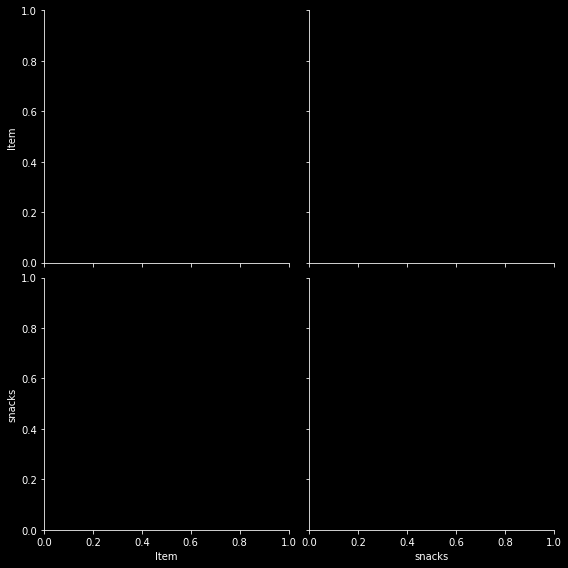

In [ ]:
sns.pairplot(df_full, hue='Item', size=4, vars=['beverage','snacks'], kind= 'scatter')